In [3]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state

import numpy as np
import matplotlib.pyplot as plt

import graphviz

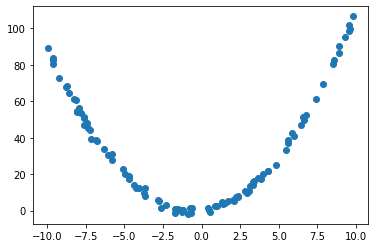

In [4]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-10, 10, 100).reshape(-1,1)
y_train = X_train**2 + X_train + 1.5*np.random.randn(100,1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='tab:blue')
plt.show()

In [5]:
est_gp = SymbolicRegressor(population_size=500,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

C:\Users\52811\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    46.66           155571       31          1.13508          1.26982     23.45s
   1    34.30          192.057        5          1.03977          1.77283     13.15s
   2    19.44          41.5444        5          1.02617          1.89524     10.79s
   3     7.62          27.1725        9          1.02543          1.84795      9.02s
   4     5.91          25.3338        5          1.01548          1.99139      8.35s
   5     5.32          22.2635        5          1.01836          1.96548      7.63s
   6     5.02          26.5136        5          1.02176          1.93494      7.12s
   7     5.06           26.483        5          1.01604          1.98637      7.07s
   8     5.08          254.717        5          1.03237           1.8394  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div'), generations=30,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=500,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [6]:
print(est_gp._program)

add(mul(X0, X0), X0)


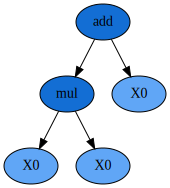

In [7]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph